In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.enable_eager_execution()

In [3]:
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + 0.2
trY_ = trY + np.random.rand(*trX.shape) * 0.2

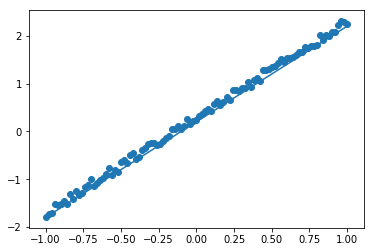

In [4]:
plt.scatter(trX, trY_)
plt.plot(trX, trY)
plt.show()

In [6]:

    X = tf.constant(trX, dtype=tf.float32)
    y = tf.constant(trY, dtype=tf.float32)
    w = tf.get_variable(name='w', dtype=tf.float32, shape=[], initializer=tf.zeros_initializer)
    b = tf.get_variable(name='b', dtype=tf.float32, shape=[], initializer=tf.zeros_initializer)
    variables = [w, b]
    num_epoch = 10000
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-3)
    for e in range(num_epoch):
        # 使用tf.GradientTape()记录损失函数的梯度信息
        with tf.GradientTape() as tape:
            y_pred = w * X + b
            loss = 0.5 * tf.reduce_sum(tf.square(y_pred - y))
        # TensorFlow自动计算损失函数关于自变量（模型参数）的梯度
        grads = tape.gradient(loss, variables)
        # TensorFlow自动根据梯度更新参数
        optimizer.apply_gradients(grads_and_vars=zip(grads, variables))

In [8]:
print(w)
print(b)

<tf.Variable 'w:0' shape=() dtype=float32, numpy=1.9999983>
<tf.Variable 'b:0' shape=() dtype=float32, numpy=0.19999994>


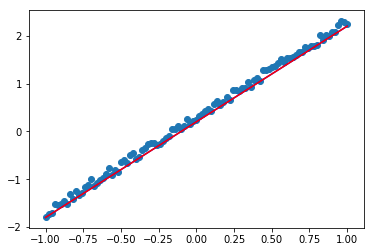

In [17]:
plt.scatter(trX, trY_)
plt.plot(trX, trY, c="blue")
plt.plot(trX, w * trX + b, c="red")

## 多元回归

In [3]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle


In [4]:
dat = load_boston()
X = dat["data"]
X = X.astype("float")
y = dat["target"]
feature_names = dat["feature_names"]

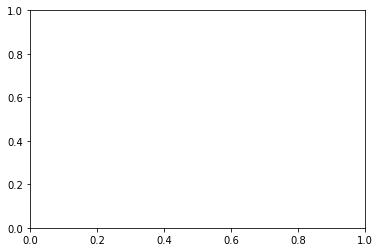

In [5]:
fig, ax = plt.subplots()

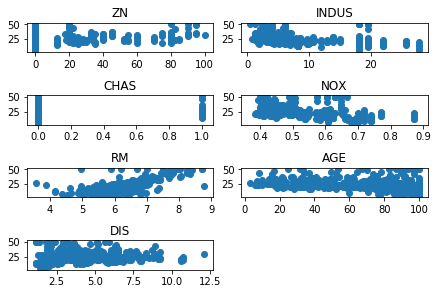

In [6]:
for i in range(1, 8):
    number = 420 + i
    ax.locator_params(nbins=3)
    ax1 = plt.subplot(number)
    plt.title(feature_names[i])
    ax1.scatter(X[:, i], y)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [7]:
cond = np.isin(feature_names, ["INDUS", "AGE"])

In [8]:
xvalues = X[:, cond]
yvalues = y.reshape(-1,1)

In [14]:
xvalues.shape

(506, 2)

In [36]:
epochs = 110
W = tf.get_variable(name="W", dtype=tf.float32, shape=[2,1], initializer=tf.zeros_initializer)
b = tf.get_variable(name="b", dtype=tf.float32, shape=[1,1], initializer=tf.zeros_initializer)
variables = [W, b]
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3)
Xvalues= tf.constant(xvalues, dtype=tf.float32)
y_true = tf.constant(yvalues, dtype=tf.float32)
global_steps = tf.get_variable(name="global_steps", dtype=tf.int32, shape=[], initializer=tf.ones_initializer)
for epoch_id in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(Xvalues, W) + b
        loss = 0.5 * tf.reduce_mean(tf.square(y_pred - y))
    grads = tape.gradient(loss, variables)
    optimizer.apply_gradients(grads_and_vars=zip(grads, variables), global_step=global_steps)
    print("epoch: %d, cost: %.4f" % (epoch_id, loss))

epoch: 0, cost: 296.0546
epoch: 1, cost: 294.2591
epoch: 2, cost: 292.4513
epoch: 3, cost: 290.6520
epoch: 4, cost: 288.8607
epoch: 5, cost: 287.0790
epoch: 6, cost: 285.3063
epoch: 7, cost: 283.5360
epoch: 8, cost: 281.7794
epoch: 9, cost: 280.0361
epoch: 10, cost: 278.2895
epoch: 11, cost: 276.5583
epoch: 12, cost: 274.8394
epoch: 13, cost: 273.1245
epoch: 14, cost: 271.4203
epoch: 15, cost: 269.7254
epoch: 16, cost: 268.0403
epoch: 17, cost: 266.3649
epoch: 18, cost: 264.6996
epoch: 19, cost: 263.0397
epoch: 20, cost: 261.3949
epoch: 21, cost: 259.7545
epoch: 22, cost: 258.1278
epoch: 23, cost: 256.5112
epoch: 24, cost: 254.9023
epoch: 25, cost: 253.3033
epoch: 26, cost: 251.7163
epoch: 27, cost: 250.1360
epoch: 28, cost: 248.5684
epoch: 29, cost: 247.0117
epoch: 30, cost: 245.4630
epoch: 31, cost: 243.9226
epoch: 32, cost: 242.3960
epoch: 33, cost: 240.8780
epoch: 34, cost: 239.3693
epoch: 35, cost: 237.8708
epoch: 36, cost: 236.3856
epoch: 37, cost: 234.9065
epoch: 38, cost: 233.4

In [35]:
xvalues.shape

(506, 2)